In [31]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data

In [32]:
#loading in data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

In [33]:
# adjust dataframe display settings
pd.set_option('display.max_columns', None)

In [34]:
#checking data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
# Print the shape of the data
df.shape

(1460, 81)

In [36]:
# print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [37]:
# AARON

In [38]:
# Running this column will Generate Histograms & Box-plots FOR ALL COLUMNS. 
# RUNNNING THIS COLUMN WILL OUTPUT 100+ GRAPHS.


# continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
# categorical_vars = df.select_dtypes(include=['object', 'category']).columns

# Creating histograms for continuous variables
# for col in continuous_vars:
    # plt.figure(figsize=(10, 6))
    # sns.histplot(df[col], kde=True)
    # plt.title(f'Histogram of {col}')
    # plt.xlabel(col)
    # plt.ylabel('Frequency')
    # plt.show()

# Creating boxplots for categorical variables
# for col in categorical_vars:
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x=col, y='SalePrice', data=df)  # Replace 'target_variable' with your continuous target variable
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.ylabel('Values')
    # plt.show()

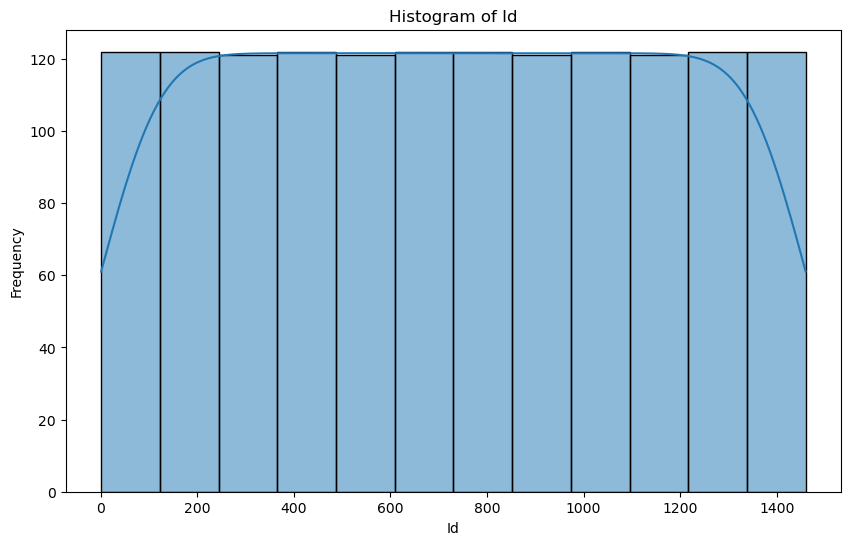

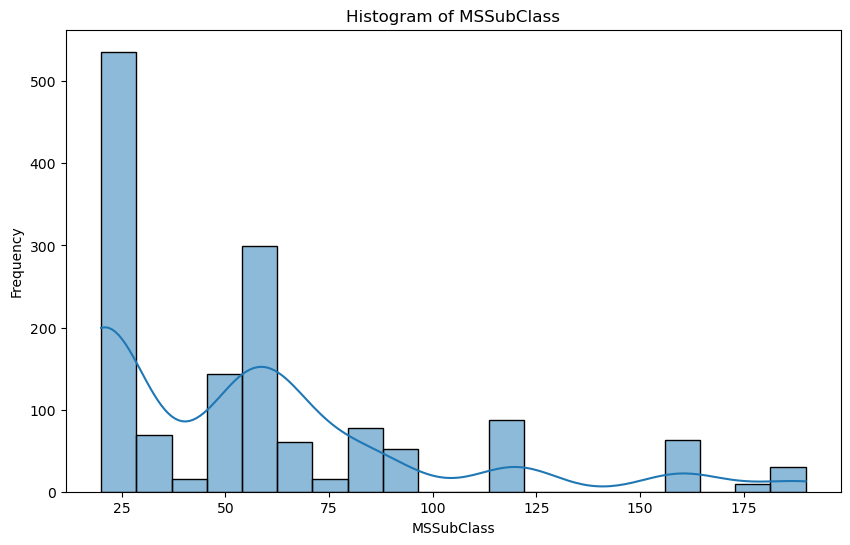

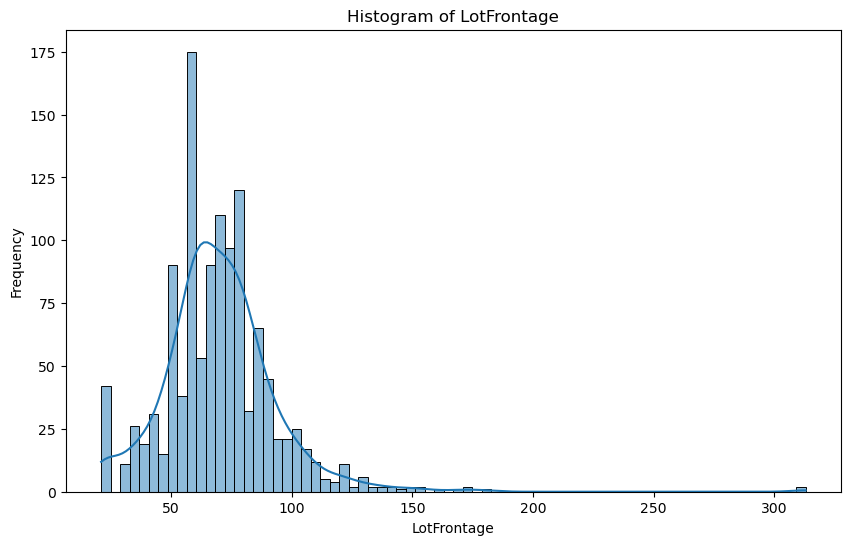

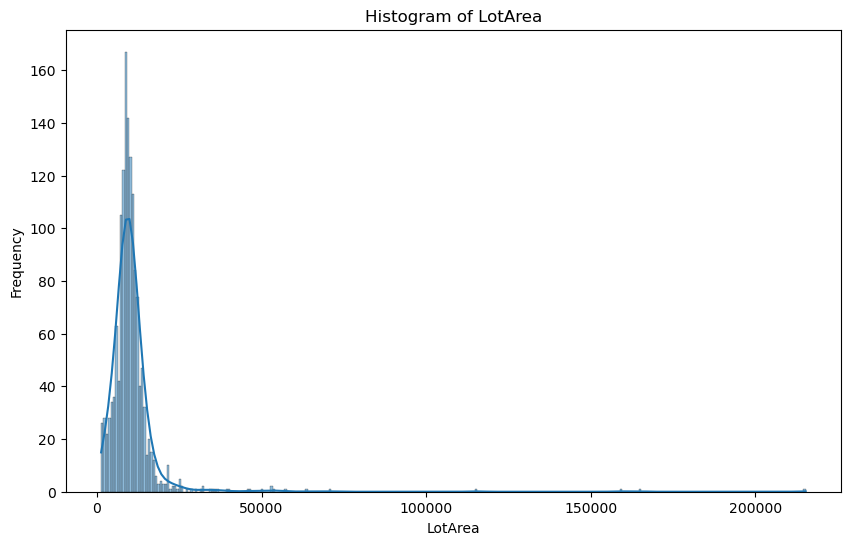

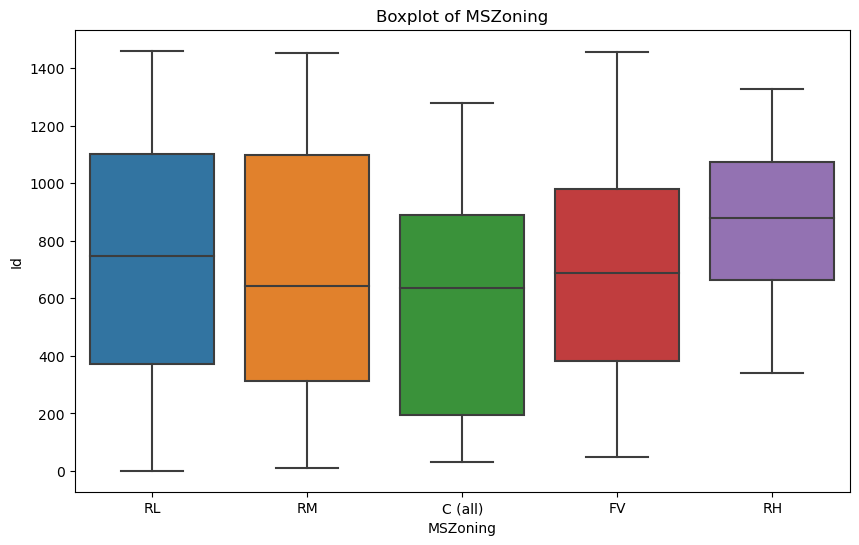

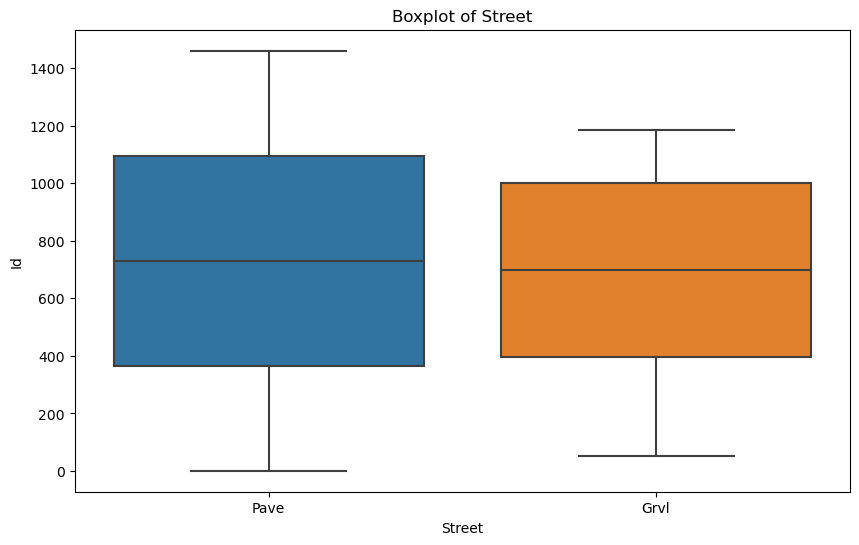

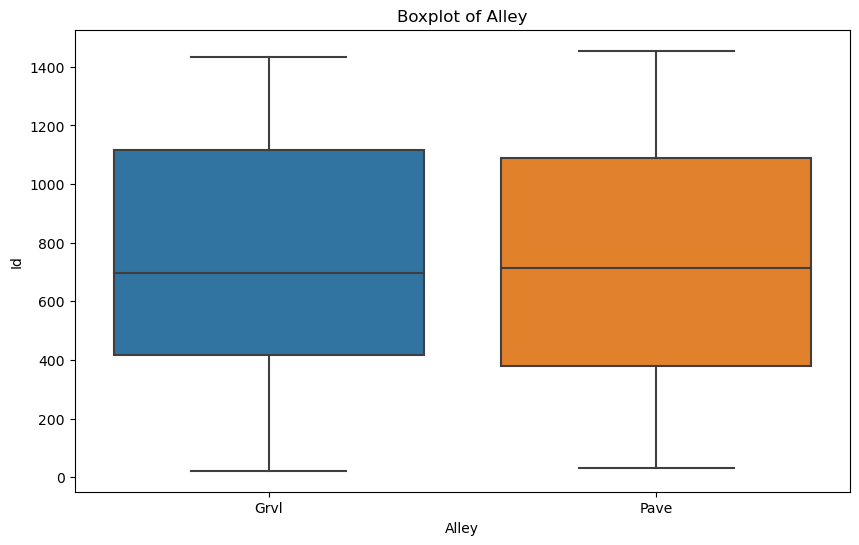

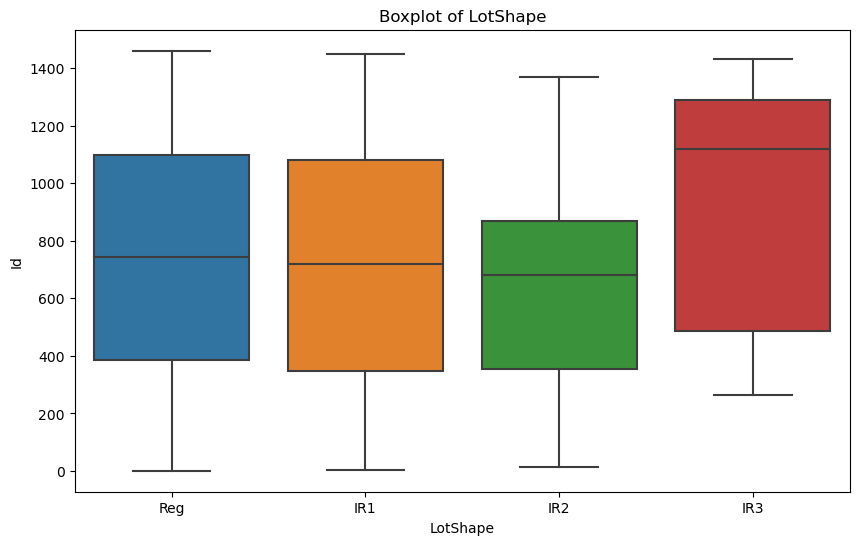

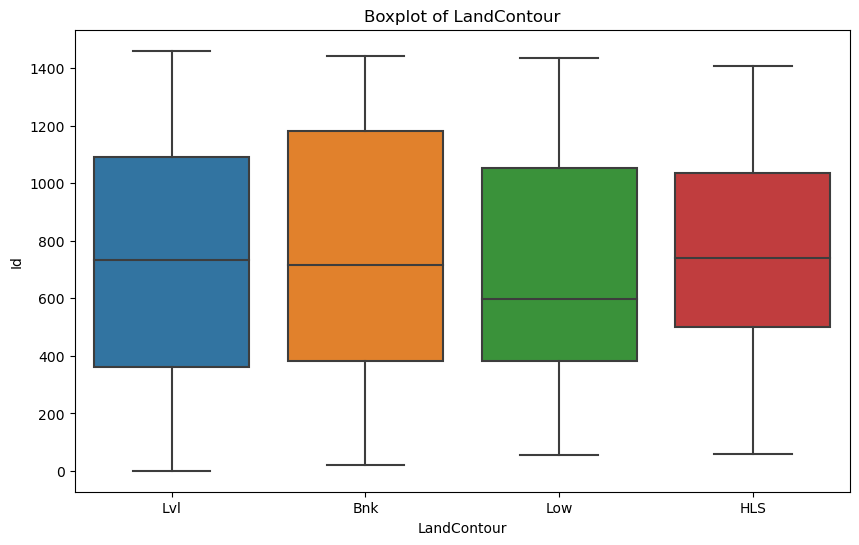

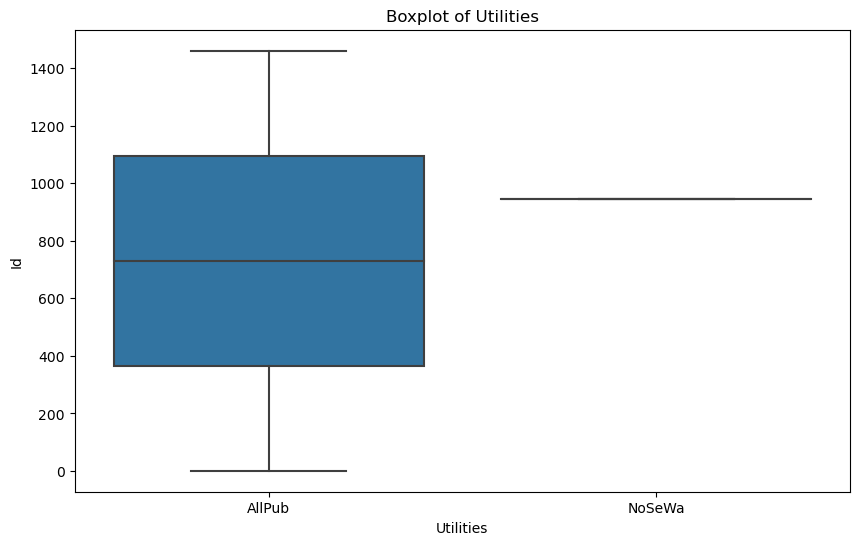

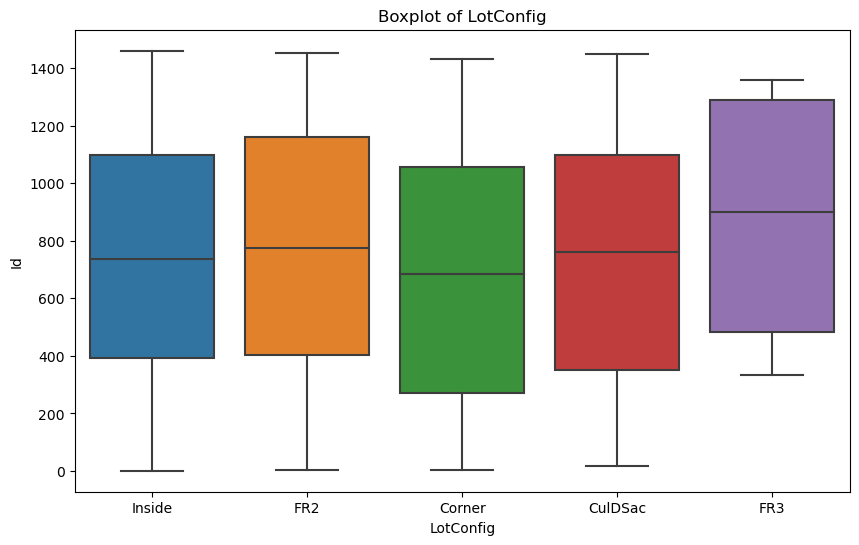

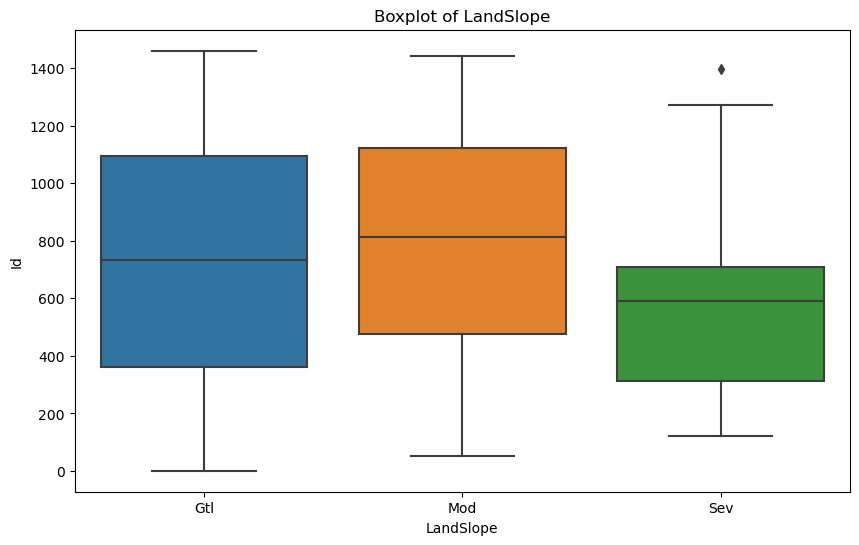

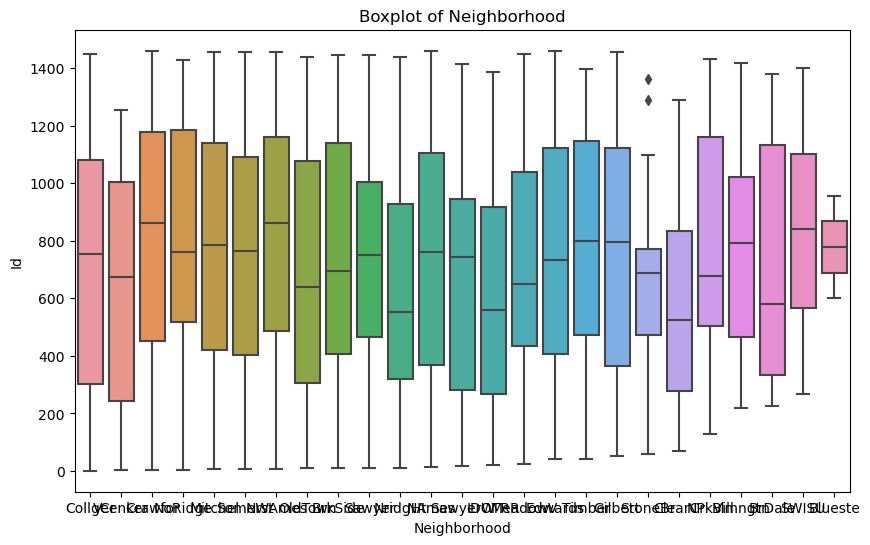

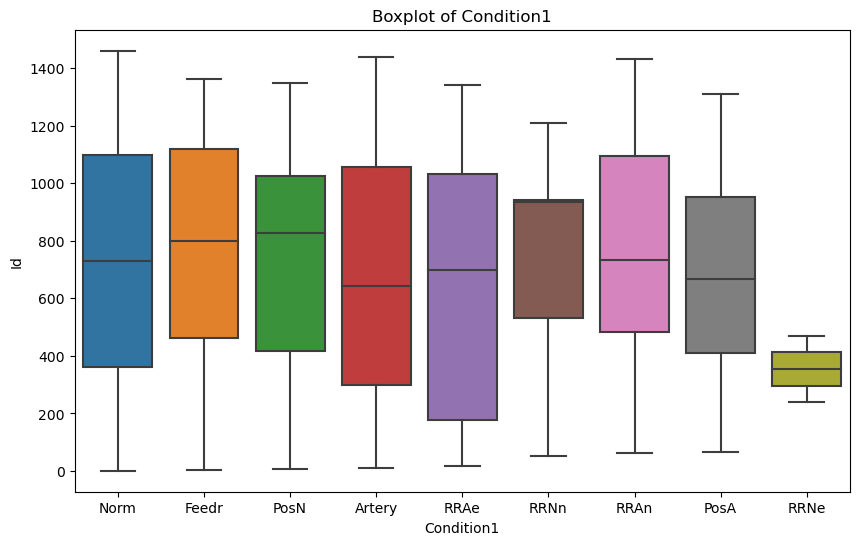

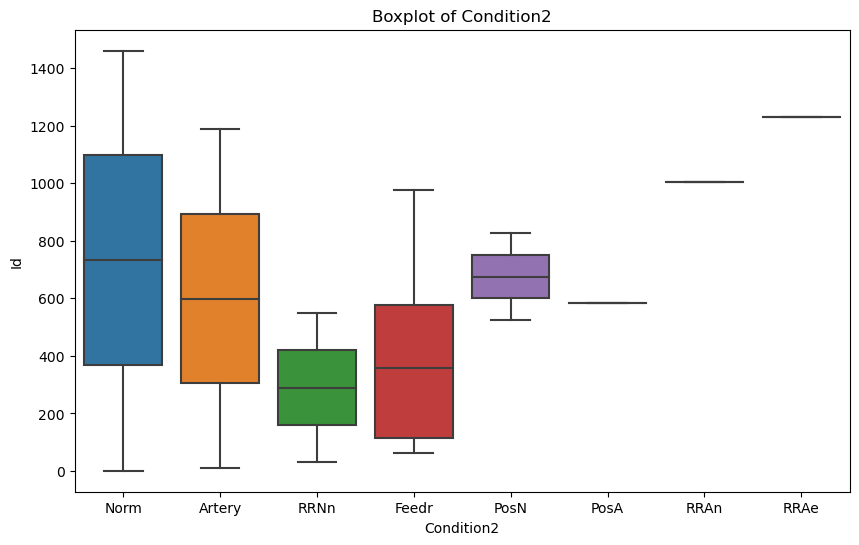

In [39]:
# Select the first 15 columns
df_15 = df.iloc[:, :15]

# Identify continuous and categorical variables
continuous_vars = df_15.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = df_15.select_dtypes(include=['object', 'category']).columns

# Plot histograms for continuous variables
for col in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_15[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots for categorical variables
for col in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=df_15[continuous_vars[0]], data=df_15)  
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(continuous_vars[0])
    plt.show()

In [40]:
# KEVIN

In [41]:
# df_first_10_columns = df.iloc[:, :10]

# Plot histograms for each of these columns
# plt.figure(figsize=(20, 15))

# for i, column in enumerate(df_first_10_columns.columns):
    # plt.subplot(3, 4, i+1) # arranging plots in 3 rows and 4 columns
    # df_first_10_columns[column].hist(bins=15)
    # plt.title(column)

# plt.tight_layout()
# plt.show()

In [42]:
# Function to calculate continuous feature statistics
def continuous_stats(df):
    cont_features = df.select_dtypes(include=['int64', 'float64'])
    stats = pd.DataFrame()
    stats['Count'] = cont_features.count()
    stats['% Miss.'] = cont_features.isnull().mean() * 100
    stats['Card.'] = cont_features.nunique()
    stats['Min'] = cont_features.min()
    stats['1st Qrt.'] = cont_features.quantile(0.25)
    stats['Mean'] = cont_features.mean()
    stats['Median'] = cont_features.median()
    stats['3rd Qrt.'] = cont_features.quantile(0.75)
    stats['Max'] = cont_features.max()
    stats['Std. Dev.'] = cont_features.std()
    return stats


def categorical_stats(df):
    cate_features = df.select_dtypes(include=['object', 'category'])
    stats = pd.DataFrame()
    # Calculate the required statistics
    stats['Count'] = cate_features.count()
    stats['% Miss.'] = cate_features.isnull().mean() * 100
    stats['Card.'] = cate_features.nunique()

    # Mode and Mode Frequency
    mode_df = cate_features.mode().iloc[0]
    mode_freq = cate_features.apply(lambda x: (x == mode_df[x.name]).sum())
    stats['Mode'] = mode_df
    stats['Mode Freq.'] = mode_freq
    stats['Mode %'] = 100 * mode_freq / cate_features.count()

    # Second Mode and Second Mode Frequency
    def second_mode(x):
        if x.nunique() > 1: 
            return x.value_counts().index[1], x.value_counts().iloc[1]
        else: 
            return None, 0
    
    second_modes = cate_features.apply(second_mode)
    stats['2nd Mode'] = second_modes.apply(lambda x: x[0])
    stats['2nd Mode Freq.'] = second_modes.apply(lambda x: x[1])
    stats['2nd Mode %'] = 100 * stats['2nd Mode Freq.'] / cate_features.count()

    
    stats.fillna('-', inplace=True)

    return stats


categorical_report = categorical_stats(df)
continuous_report = continuous_stats(df)



print(f"Continuous Features")
print(continuous_report)
print(f"-----------------------------------------------------------------------------")
print(f"-----------------------------------------------------------------------------")
print(f"-----------------------------------------------------------------------------")
print(f"Categorical Features")
print(categorical_report)


Continuous Features
               Count    % Miss.  Card.      Min   1st Qrt.           Mean  \
Id              1460   0.000000   1460      1.0     365.75     730.500000   
MSSubClass      1460   0.000000     15     20.0      20.00      56.897260   
LotFrontage     1201  17.739726    110     21.0      59.00      70.049958   
LotArea         1460   0.000000   1073   1300.0    7553.50   10516.828082   
OverallQual     1460   0.000000     10      1.0       5.00       6.099315   
OverallCond     1460   0.000000      9      1.0       5.00       5.575342   
YearBuilt       1460   0.000000    112   1872.0    1954.00    1971.267808   
YearRemodAdd    1460   0.000000     61   1950.0    1967.00    1984.865753   
MasVnrArea      1452   0.547945    327      0.0       0.00     103.685262   
BsmtFinSF1      1460   0.000000    637      0.0       0.00     443.639726   
BsmtFinSF2      1460   0.000000    144      0.0       0.00      46.549315   
BsmtUnfSF       1460   0.000000    780      0.0     223.

In [43]:
#checked for duplicates
df.duplicated().sum()

0

###Cont Feature with missing values - LotFrontage 17%, GarageYrBlt 5.54% ###
###Cate Feature with missing values - Alley 93%, MasVnrType 59%, FireplaceQu 47%, 
                                    BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 all 2.5%
                                    GarageType, GarageFinish, GarageQual, GarageCond all 5.5%
                                    PoolQC, Fence, MiscFeature all > 80% ###


In [44]:
#dropping columns with too many null values
df = df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

#imputing cont missing values
numeric = df.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric.columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean(numeric_only=True))

#imputing cat missing values
# boolean_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
# if 'class' in boolean_columns:
    # boolean_columns.remove('class')
# df[boolean_columns] = df[boolean_columns].astype('bool')
# df[boolean_columns] = df[boolean_columns].fillna(df.mode())

# Imputing categorical missing values
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'class' in categorical_columns:
    categorical_columns.remove('class')

# Imputing missing values with the mode of each column
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the mode value for the column
    df[col] = df[col].fillna(mode_value)  # Fill missing values with the mode

In [45]:
#checking for null values
df.isna().sum()/len(df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [46]:
df.shape

(1460, 77)

In [47]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

cont_features = df.select_dtypes(include=['int64', 'float64'])

def detect_outliers_knn(cont_features, k=5, threshold=.1):
    # Normalize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(cont_features)

    # Fit the model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(normalized_data)
    
    # Find distances and indices of k-neighbor
    distances, indices = knn.kneighbors(normalized_data)

    # Outlier scores
    outlier_scores = np.mean(distances, axis=1)

    # Determine a threshold for outlier scores
    outlier_threshold = np.mean(outlier_scores) + threshold * np.std(outlier_scores)

    # Identify outliers
    outliers = outlier_scores > outlier_threshold

    return outliers, outlier_scores


outliers, scores = detect_outliers_knn(cont_features)

# Filtering out the outliers
df = cont_features[~outliers]

df.shape

(953, 38)

In [48]:
# get dummies for categorical variables in df
df = pd.get_dummies(df, drop_first=True)

In [49]:
# Remove ID Column
df = df.drop(columns=['Id'])

In [50]:
#checking data
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000


In [51]:
df.shape

(953, 37)

In [52]:
# MASON

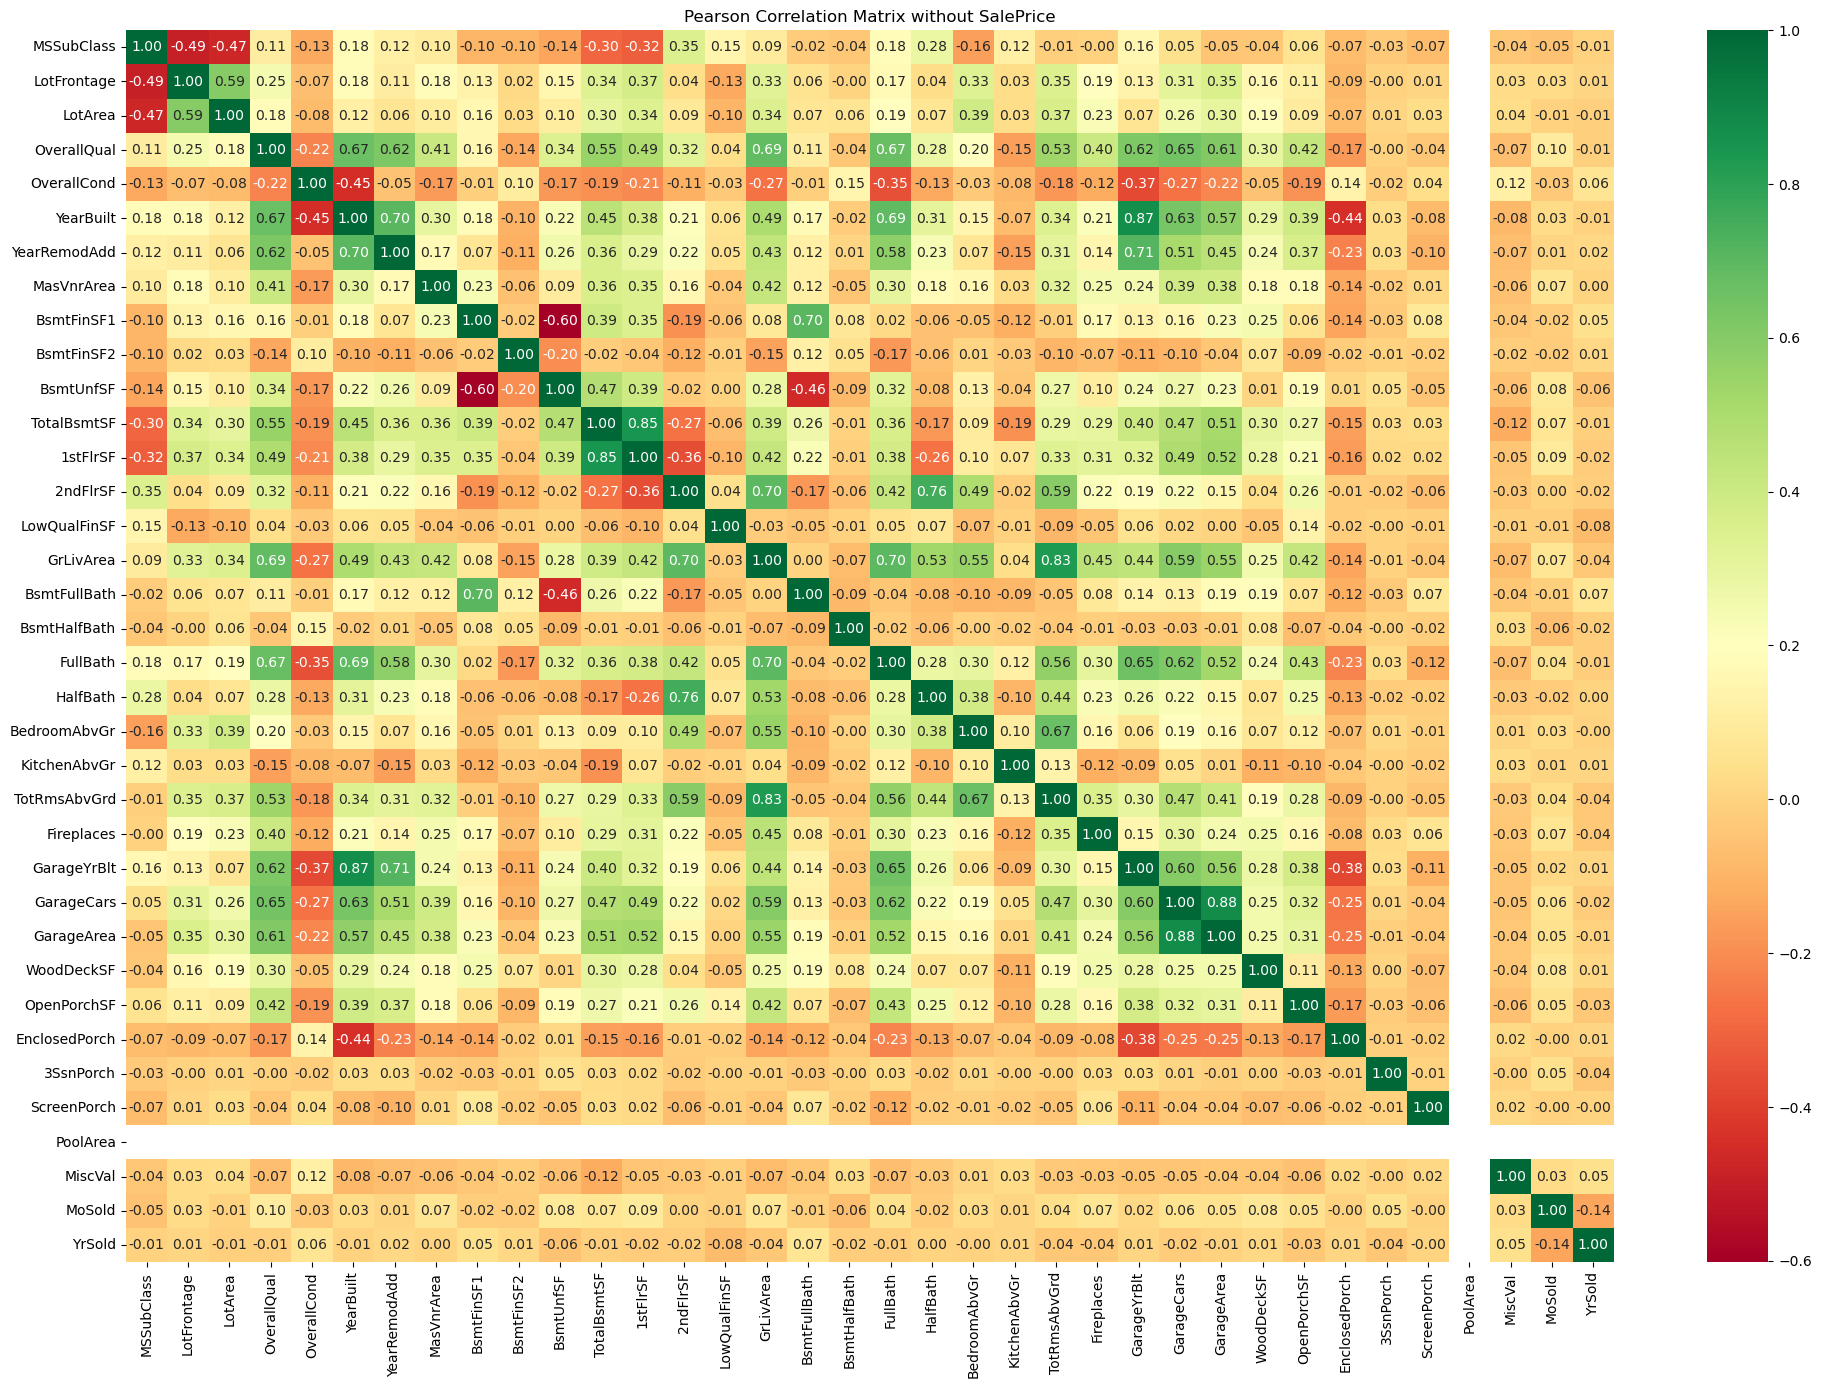

In [53]:
# Calculate the Pearson correlation matrix
corr_matrix = df.corr()

# Remove the 'SalePrice' column and row
corr_matrix = corr_matrix.drop(columns='SalePrice', axis=1)
corr_matrix = corr_matrix.drop('SalePrice', axis=0)

# Set up the matplotlib figure
plt.figure(figsize=(24, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdYlGn')

# Add title and labels
plt.title('Pearson Correlation Matrix without SalePrice')
plt.show()

In [54]:
# Identify highly correlated features
threshold = 0.7
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_pairs.append((colname, rowname, corr_matrix.iloc[i, j]))

# Sort pairs by correlation value in descending order
high_corr_pairs = sorted(high_corr_pairs, key=lambda pair: -abs(pair[2]))

# Print highly correlated pairs
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with a correlation of {pair[2]}")

Highly correlated pairs:
GarageArea and GarageCars with a correlation of 0.8787657521442847
GarageYrBlt and YearBuilt with a correlation of 0.8733234796353648
1stFlrSF and TotalBsmtSF with a correlation of 0.8475188145330976
TotRmsAbvGrd and GrLivArea with a correlation of 0.8287417636930428
HalfBath and 2ndFlrSF with a correlation of 0.755062442606933
GarageYrBlt and YearRemodAdd with a correlation of 0.7135721793414579
BsmtFullBath and BsmtFinSF1 with a correlation of 0.7043349619240602


In [55]:
# Calculate the correlation of all features with 'SalePrice'
saleprice_corr = df.corr()['SalePrice'].drop('SalePrice')  # Drop self-correlation

# Create a set to hold the names of the features to drop
features_to_drop = set()

# For each tuple of highly correlated features and their correlation value
for feature1, feature2, _ in high_corr_pairs:
    # Compare the correlation with 'SalePrice' and add the lower one to the drop list
    if saleprice_corr[feature1] > saleprice_corr[feature2]:
        features_to_drop.add(feature2)
    else:
        features_to_drop.add(feature1)

# Now df_reduced contains only the features with higher correlation with 'SalePrice'
print("Features we should consider dropping:", features_to_drop)

Features we should consider dropping: {'HalfBath', '1stFlrSF', 'YearRemodAdd', 'BsmtFullBath', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}


In [56]:
# Drop the features in the drop list
df_reduced = df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features:")
print(df_reduced.columns)

Remaining features:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [57]:
df_reduced.shape

(953, 30)

In [58]:
df_reduced.head(25)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000000,8450,7,5,2003,196.0,706,0,150,856,854,0,1710,0,2,3,1,0,2,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000000,9600,6,8,1976,0.0,978,0,284,1262,0,0,1262,1,2,3,1,1,2,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000000,11250,7,5,2001,162.0,486,0,434,920,866,0,1786,0,2,3,1,1,2,0,42,0,0,0,0,0,9,2008,223500
4,60,84.000000,14260,8,5,2000,350.0,655,0,490,1145,1053,0,2198,0,2,4,1,1,3,192,84,0,0,0,0,0,12,2008,250000
6,20,75.000000,10084,8,5,2004,186.0,1369,0,317,1686,0,0,1694,0,2,3,1,1,2,255,57,0,0,0,0,0,8,2007,307000
10,20,70.000000,11200,5,5,1965,0.0,906,0,134,1040,0,0,1040,0,1,3,1,0,1,0,0,0,0,0,0,0,2,2008,129500
12,20,70.049958,12968,5,6,1962,0.0,737,0,175,912,0,0,912,0,1,2,1,0,1,140,0,0,0,176,0,0,9,2008,144000
13,20,91.000000,10652,7,5,2006,306.0,0,0,1494,1494,0,0,1494,0,2,3,1,1,3,160,33,0,0,0,0,0,8,2007,279500
15,45,51.000000,6120,7,8,1929,0.0,0,0,832,832,0,0,854,0,1,2,1,0,2,48,112,0,0,0,0,0,7,2007,132000
16,20,70.049958,11241,6,7,1970,180.0,578,0,426,1004,0,0,1004,0,1,2,1,1,2,0,0,0,0,0,0,700,3,2010,149000


In [59]:
# Aaron

In [60]:
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the scaled data
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df)

# numpy array with the reduced dimensionality
df_reduced = pd.DataFrame(df_reduced)

# Shape Check
reduced_shape = df_reduced.shape
explained_variance = pca.explained_variance_ratio_

reduced_shape, explained_variance

((953, 1), array([0.99742222]))

In [ ]:
# Features we should consider dropping: {'HalfBath', '1stFlrSF', 'YearRemodAdd', 'BsmtFullBath', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}


# Remaining features:
# Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
#       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
#       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
#       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
#       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
#      dtype='object')

# We can look at dropping more features as our model has more than we expected ; however, 
# we want to see the final result of this model before we come back to eliminate more features. 